Nyquist sampling theorem is quite remarkable, and it's better learned from examples. Consider a sinusoidal signal with a frequency of 1 GHz. Let's create it and plot it in Python:

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

freq = 1e9 #1GHz
t_start = 0
t_stop = 5e-9
t_step = 1e-12


def sampled_sine(t_start, t_stop, t_step, freq):
    #First create a "time-domain" vector. Let's try 5 ns long, with a step between times of 1ps
    t = np.arange(t_start, t_stop, t_step)
    t = t[:, np.newaxis] #This makes the vector an nx1 matrix, i.e. a "column" vector

    #Now, let's create the signal and call it x
    w = 2*math.pi*freq #This is omega, the angular frequency
    x = np.sin(w*t)
    
    return np.concatenate((t, x), axis=1)

x1 = sampled_sine(t_start, t_stop, t_step, freq)

#Finally, plot it vs time
plt.plot(x1[:,0],x1[:,1])
plt.grid()

We can clearly see that the signal is as we expected. We could even estimate the period to be 1ns, again, as expected. Note that because we are working on a computer we actually had to "sample" the waveform. What we have is a vector stored in x that represents the value of the waveform. I used a step size of 1ps so the waveform looks smooth, this is just a trick.

But, what happens if we sample at a lower rate? Let's try a few different values.

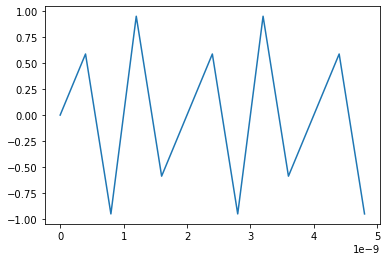

In [2]:
t_step = t_step*400
#t_stop = 100e-9
x2 = sampled_sine(t_start, t_stop, t_step, freq)

#Finally, plot it vs time
plt.plot(x2[:,0],x2[:,1]);

2.5


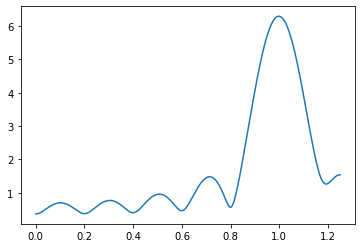

In [3]:
NFFT = 2**10
Fs = 1/t_step
print(Fs*1e-9)
freqaxis = np.linspace(0,Fs/2,int(NFFT/2+1))

X = np.fft.rfft(x2[:,1],NFFT)
plt.plot(freqaxis*1e-9, abs(X));